In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import cv2
import scipy


In [2]:
from keras.src.callbacks import early_stopping
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
def video_to_3d_array(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        raise ValueError(f"Cannot open video file: {video_path}")

    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:  # If no more frames, break
            break
        # Convert frame to grayscale (optional, for a single channel)
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(frame_gray)

    cap.release()

    # Stack all frames into a 3D NumPy array
    video_array = np.stack(frames, axis=2)  # Shape: (height, width, num_frames)
    return video_array

In [15]:
# Example usage
video_path = "/Volumes/My Passport/Thermography True setup/332C2309/332C2309_2024-12-16-15-52-10_thermal_test.mp4"
video_3d_array = video_to_3d_array(video_path)

print("3D Array shape (Height, Width, Frames):", video_3d_array.shape)

3D Array shape (Height, Width, Frames): (1536, 1920, 651)


In [11]:
def visualize_with_opencv_slider(video_3d_array):
    num_frames = video_3d_array.shape[2]
    current_frame_idx = 0  # Initial frame index

    # Create a window to display the frame
    cv2.namedWindow('Frame Viewer')

    def update_frame(val):
        nonlocal current_frame_idx
        current_frame_idx = val  # Update the current frame index
        frame = video_3d_array[:, :, current_frame_idx]
        cv2.imshow('Frame Viewer', frame)

    def show_pixel_coordinates(event, x, y, flags, param):
        if event == cv2.EVENT_MOUSEMOVE:  # Triggered when the mouse moves
            frame = video_3d_array[:, :, current_frame_idx]
            if 0 <= x < frame.shape[1] and 0 <= y < frame.shape[0]:  # Valid coordinates
                pixel_value = frame[y, x]
                text = f"X: {x}, Y: {y}, Value: {pixel_value}"

                # Create a copy of the frame to overlay text
                display_frame = frame.copy()
                cv2.putText(display_frame, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,0.6, (0, 0, 255), 1, cv2.LINE_AA)  # Red text color
                cv2.imshow('Frame Viewer', display_frame)

    # Attach the mouse callback
    cv2.setMouseCallback('Frame Viewer', show_pixel_coordinates)

    # Create a trackbar to switch frames
    cv2.createTrackbar('Frame', 'Frame Viewer', 0, num_frames - 1, update_frame)

    # Show the initial frame
    cv2.imshow('Frame Viewer', video_3d_array[:, :, current_frame_idx])

    # Wait until the user closes the window
    cv2.waitKey(0)
    cv2.destroyAllWindows()


visualize_with_opencv_slider(video_3d_array)


In [16]:
video_3d_array=video_3d_array[630:830, 750:1180, :]
print("3D Array cropped shape (Height, Width, Frames):", video_3d_array.shape)

3D Array cropped shape (Height, Width, Frames): (200, 430, 651)


In [17]:
sound_material=video_3d_array[100,215,:]
defect=video_3d_array[142,257,:]
time_series = np.arange(1, 652)

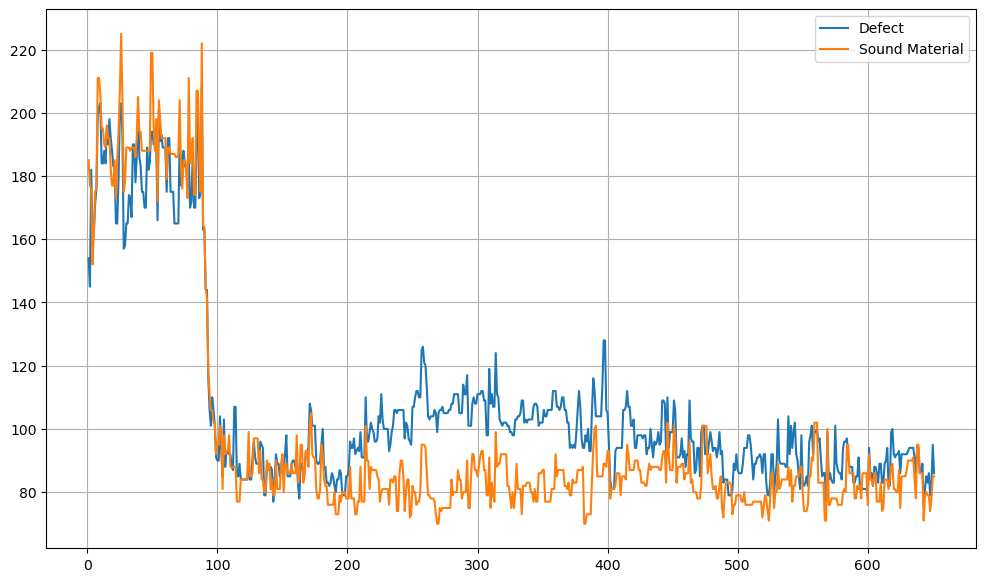

In [33]:
plt.figure(figsize=(12,7))
plt.plot(time_series, defect, label='Defect')
plt.plot(time_series, sound_material, label='Sound Material')
plt.legend()
plt.grid()

AttributeError: 'Boson' object has no attribute 'read_seq'